<a href="https://colab.research.google.com/github/Sudaiii/ML-Experiments/blob/main/pinguino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

No todas se usan. Se tomo la colección de librerias del GitHub del curso: https://github.com/castudil/Machine-Learning/blob/main/S04-KNN/Iris-KNN.ipynb


In [341]:
import pandas as pd # amnipulacion de datos
import numpy as np # parte numerica
import matplotlib.pyplot as plt # visualizacion grafica
import seaborn as sns # mejora graficas, paletas de colores
# sklearn kit cientifico con mnodulos de machile learning.
from sklearn.model_selection import train_test_split # divide conjuntos de entrenamiento y validacione
from sklearn.preprocessing import StandardScaler, LabelEncoder # preprocesamiento de datos, en particular estandarizacion de datos.
from sklearn.neighbors import KNeighborsClassifier # algoritmo knn propiamente tal
from sklearn.metrics import confusion_matrix # matrices de confusión para analizar los resultados de los clasificadores
from sklearn.metrics import f1_score # tuvimos una métrica en particular que se conoce como score f1
from sklearn.metrics import accuracy_score # esta es la métrica por excelencia, denominada certeza en español

# Preprocesamiento

En esta sección se observan los datos y preparan para usar.

Se cargan el data set de los pingüinos y observamos la estructura de la tabla.

In [342]:
url = "https://drive.google.com/file/d/1-DaBCr64zZCgwxGbQKK-Aiw9Ejt4KoN8/view?usp=sharing"
url = "https://drive.google.com/uc?id=" + url.split('/')[-2]
penguin = pd.read_csv(url)
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Datos nulos no son utiles para los modelos de Machine Learning. Por lo tanto, se debe verificar si hay datos que se tengan que modificar o eliminar.

In [343]:
penguin.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Si hay datos nulos. Por lo tanto, hay que escoger una forma de manejarlo.

Para este estudio, se eliminaran todos las tuplas con datos nulos.


In [344]:
penguin = penguin.dropna()
penguin.isnull().sum()


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Además, hay datos que son discretos. Estos sirven más como categorias que como medidas de escala. Estos datos en esta tabla son representados por strings, lo cual los modelos no pueden manejar de forma directa. Por lo tanto, aquellos datos que son string se convierten a categorias numericas.

In [345]:
label_enconder = LabelEncoder()
penguin["island"] = label_enconder.fit_transform(penguin["island"])
penguin["sex"] = label_enconder.fit_transform(penguin["sex"])

penguin[["island", "sex"]][:]

,island,sex
0,2,2
1,2,1
2,2,1
4,2,1
5,2,2
...,...,...
338,0,1
340,0,1
341,0,2
342,0,1


Ahora, se debe separar los datos de los label (puesto a que si el modelo tuviera el label, seria trampa).

Aca, "x" corresponde a los datos y "y" al label.

In [346]:
x = penguin.iloc[:, 1:]
y = penguin.iloc[:, 0]

In [347]:
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
4,2,36.7,19.3,193.0,3450.0,1
5,2,39.3,20.6,190.0,3650.0,2


In [348]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

Luego, debemos dividir los datos de entrenamiento de los datos de prueba. Aca se utiliza una distribución de datos de prueba de 30%.

In [349]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [350]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

233
233
101
101


Finalmente, hay que normalizar los datos de forma de que una columna no tenga mas poder que otra sobre las predicciones.

In [351]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Predicción

Para este estudio se hara uso del modelo de predicción KNN.



In [352]:
knn = KNeighborsClassifier(n_neighbors=15, p=2,metric='euclidean')

A este modelo le entregamos los datos de entrenamiento.

In [353]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

Luego hacemos que este modelo prediga a que corresponden los datos de prueba.

In [354]:
y_pred = knn.predict(x_test)
y_pred

array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 

Una forma de comprobar cuales datos fueron correctos y cuales no es con una confusion matrix, donde alinea las predicciones con lo que eran realmente.

In [355]:
from sklearn.metrics import f1_score
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[50  0  0]
 [ 1 17  0]
 [ 0  0 33]]


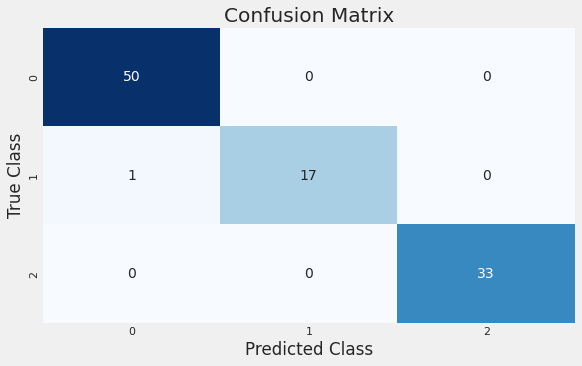

In [356]:
sns.heatmap(cm, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Finalmente, de estos datos se puede obsevar se obtiene el siguiente porcentaje de exito:

In [357]:
print(accuracy_score(y_test, y_pred))

0.9900990099009901


# Cross-validation

Una forma de validar el modelo que es un poco mas avanzada es mediante Cross-validation.

A este le especificamos 10 "folds" y obtenemos sus resultados.

In [358]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x, y, cv=10)

Finalmente, obtenemos el promedio de estos valores.

In [359]:
scores.mean()

0.7701426024955437